<a href="https://colab.research.google.com/github/AshSama12/adult-dataset-regression-svr-vs-linear-regression/blob/main/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
import pandas as pd

# Unzipping the dataset
file_path = "/content/adult (1).zip"
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall("/content/")

# Loading the data
data_path = "/content/adult.data"  # Change if the file is named differently
columns = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation", "relationship",
           "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"]

df = pd.read_csv(data_path, header=None, names=columns, na_values=" ?", skipinitialspace=True)
df.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2]:
# Checking for missing values
df.isnull().sum()

# Dropping missing values
df.dropna(inplace=True)

# Checking for class distribution in the target column
df['income'].value_counts()

# Encoding categorical variables into numeric values (e.g., 'income')
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

# Converting categorical features using one-hot encoding
df = pd.get_dummies(df, drop_first=True)
df.head()


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,39,77516,13,2174,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,0,0,13,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [3]:
# Dividing the data into input and target
X = df.drop('income', axis=1)
y = df['income']


In [4]:
from sklearn.model_selection import train_test_split

# Train-validation-test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)  # 0.33 * 0.3 = ~10%


In [5]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Scaling the features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVM classifier with a linear kernel
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)


SVC(kernel='linear', random_state=42)

In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Reduce data to 2D for visualization
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train_scaled)

# Train the model again with 2D data
svm_model_2d = SVC(kernel='linear')
svm_model_2d.fit(X_train_2d, y_train)

SVC(kernel='linear')

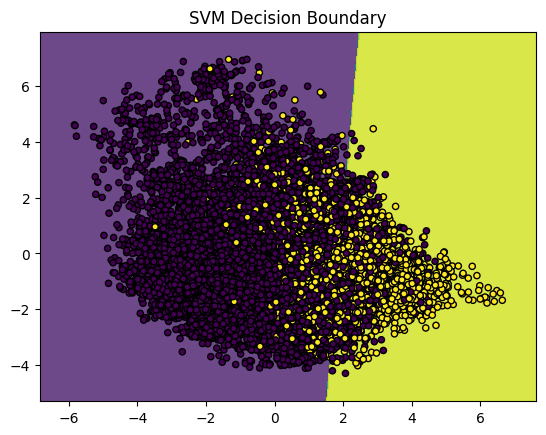

In [7]:
# Plot decision boundary
def plot_decision_boundary(X, y, model):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=20)
    plt.title("SVM Decision Boundary")
    plt.show()

plot_decision_boundary(X_train_2d, y_train, svm_model_2d)

In [8]:
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    svm_model = SVC(kernel=kernel)
    svm_model.fit(X_train_scaled, y_train)
    print(f"Accuracy with {kernel} kernel: {svm_model.score(X_val_scaled, y_val)}")


Accuracy with linear kernel: 0.8524064171122995
Accuracy with poly kernel: 0.8276546982429336
Accuracy with rbf kernel: 0.8533231474407945


In [9]:
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    svm_model = SVC(kernel=kernel)
    svm_model.fit(X_train_scaled, y_train)
    print(f"Accuracy with {kernel} kernel: {svm_model.score(X_val_scaled, y_val)}")


Accuracy with linear kernel: 0.8524064171122995
Accuracy with poly kernel: 0.8276546982429336
Accuracy with rbf kernel: 0.8533231474407945


In [11]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# K-Fold Cross-Validation
kfold_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5)
print("K-Fold CV Average Score:", kfold_scores.mean())

# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5)
stratified_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=skf)
print("Stratified K-Fold CV Average Score:", stratified_scores.mean())


K-Fold CV Average Score: 0.8469639106441305
Stratified K-Fold CV Average Score: 0.8469639106441305


In [13]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the SVR model
svr_model = SVR(kernel='rbf')

# Train the model
svr_model.fit(X_train_scaled, y_train)

# Predictions on validation data
y_val_pred_svr = svr_model.predict(X_val_scaled)

# Evaluating the SVR model
mse_svr = mean_squared_error(y_val, y_val_pred_svr)
r2_svr = r2_score(y_val, y_val_pred_svr)

print(f"SVR Mean Squared Error: {mse_svr}")
print(f"SVR R^2 Score: {r2_svr}")



SVR Mean Squared Error: 0.11565247117421981
SVR R^2 Score: 0.3662715305139057


In [14]:
from sklearn.linear_model import LinearRegression

# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predictions for validation data
y_val_pred_lr = lr_model.predict(X_val_scaled)

# Evaluating the Linear Regression model
mse_lr = mean_squared_error(y_val, y_val_pred_lr)
r2_lr = r2_score(y_val, y_val_pred_lr)

print(f"Linear Regression Mean Squared Error: {mse_lr}")
print(f"Linear Regression R^2 Score: {r2_lr}")

# Compare with SVR
print(f"Comparison of SVR and Linear Regression:")
print(f"SVR - MSE: {mse_svr}, R^2: {r2_svr}")
print(f"Linear Regression - MSE: {mse_lr}, R^2: {r2_lr}")


Linear Regression Mean Squared Error: 0.11582515253884038
Linear Regression R^2 Score: 0.36532530692007603
Comparison of SVR and Linear Regression:
SVR - MSE: 0.11565247117421981, R^2: 0.3662715305139057
Linear Regression - MSE: 0.11582515253884038, R^2: 0.36532530692007603


In [15]:
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    svr_model = SVR(kernel=kernel)
    svr_model.fit(X_train_scaled, y_train)
    y_val_pred = svr_model.predict(X_val_scaled)

    print(f"Kernel: {kernel}")
    print(f"MSE: {mean_squared_error(y_val, y_val_pred)}")
    print(f"R^2: {r2_score(y_val, y_val_pred)}\n")


Kernel: linear
MSE: 0.14162944327300392
R^2: 0.22392829648783452

Kernel: poly
MSE: 0.13159368761625367
R^2: 0.27892015276134263

Kernel: rbf
MSE: 0.11565247117421981
R^2: 0.3662715305139057

